<a href="https://colab.research.google.com/github/VyomPandya/Summer-Internship-Sem-7/blob/main/Week_2_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revenue Forecasting Analysis

This notebook implements multiple time series forecasting methods to predict future revenue based on e-commerce transaction data.

## Project Overview

**Objective:** Forecast future revenue using historical transaction data and compare different forecasting approaches.

**Data Source:** E-commerce transaction data stored in `master_dataset.csv`.

## Implementation Steps

### 1. Data Preparation
- Loading transaction data with appropriate date parsing
- Converting timestamps to date format for daily aggregation
- Aggregating daily revenue for time series analysis

### 2. Exploratory Visualization
- Plotting daily revenue trends over time
- Identifying patterns, seasonality, and potential outliers

### 3. Prophet Forecasting
[Prophet](https://facebook.github.io/prophet/) is Facebook's time series forecasting tool that:
- Handles daily seasonality, weekly patterns, and holiday effects
- Automatically detects trend changes
- Makes 30-day forward predictions with uncertainty intervals

### 4. ARIMA Forecasting
The Auto-Regressive Integrated Moving Average (ARIMA) approach:
- Automatically determines optimal p, d, q parameters using `auto_arima`
- Creates non-seasonal time series forecasts
- Provides alternative modeling approach for comparison

### 5. Regression-Based Forecasting
A causal modeling approach that:
- Aggregates data monthly to reduce noise
- Uses price and freight values as predictive features
- Applies linear regression to predict payment values
- Evaluates model performance using MAE and RMSE metrics

### 6. Scenario Analysis
Business scenario simulation that:
- Models the impact of a 10% increase in marketing spend (simulated by increasing price)
- Compares actual, predicted, and scenario-based revenue forecasts
- Provides decision support for marketing investment decisions

## Results and Insights

The multiple forecasting methods allow for:
- Cross-validation of predictions using different statistical approaches
- Identification of the most reliable forecasting technique for this dataset
- Quantification of forecast accuracy using error metrics
- Understanding of key revenue drivers through regression analysis

## Business Applications

This revenue forecasting system can be used to:
1. Set realistic revenue targets for upcoming periods
2. Plan inventory and resource allocation based on expected demand
3. Simulate different business scenarios to optimize strategy
4. Identify seasonal patterns to inform marketing and promotional activities
5. Support budget planning and financial projections

## Future Improvements

Potential enhancements to consider:
- Ensemble methods combining multiple forecasting approaches
- Inclusion of external variables (holidays, promotions, marketing spend)
- Implementation of deep learning models (LSTM, Transformer)
- Cross-validation techniques specific to time series data
- Hierarchical forecasting by product category or customer segment

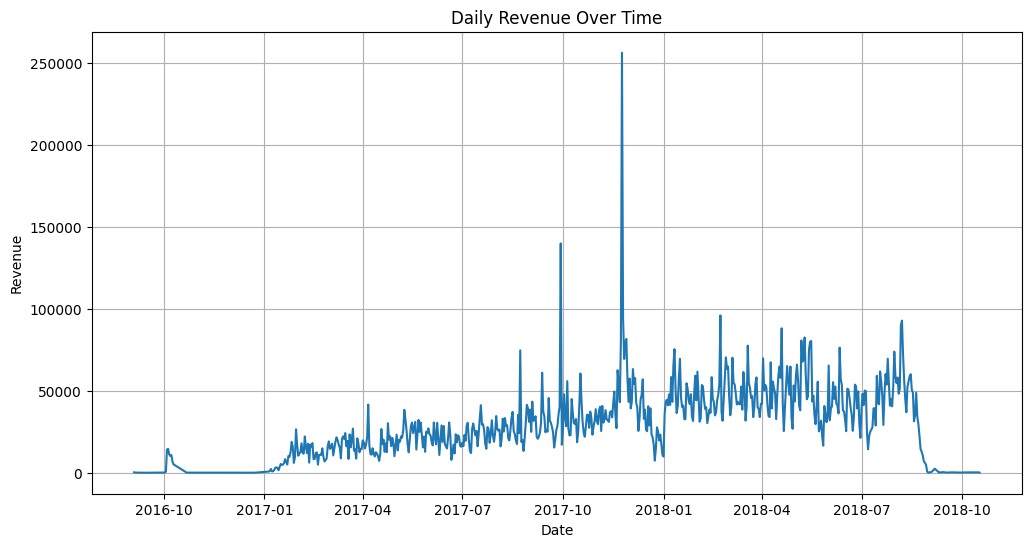

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdy2z8nw/4h8x_3mx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppdy2z8nw/2akh1sbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42365', 'data', 'file=/tmp/tmppdy2z8nw/4h8x_3mx.json', 'init=/tmp/tmppdy2z8nw/2akh1sbn.json', 'output', 'file=/tmp/tmppdy2z8nw/prophet_modelopuen7m3/prophet_model-20250520163212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


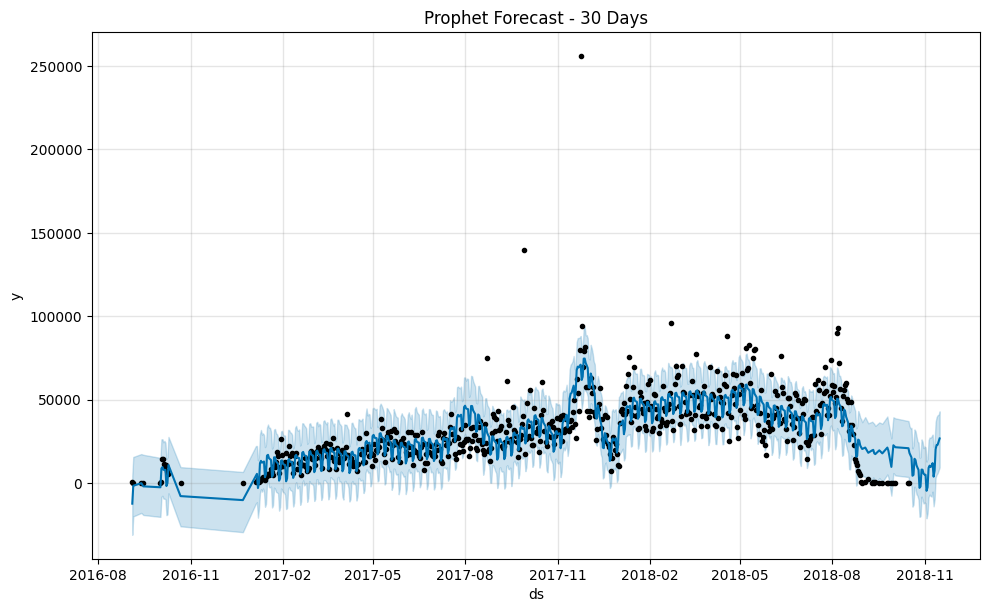

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13905.614, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14090.962, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14027.256, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13930.494, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14088.962, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13904.130, Time=0.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13902.199, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=13904.606, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13906.998, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13906.582, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=13900.177, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=13928.494, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13902.109, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=13902.499, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0

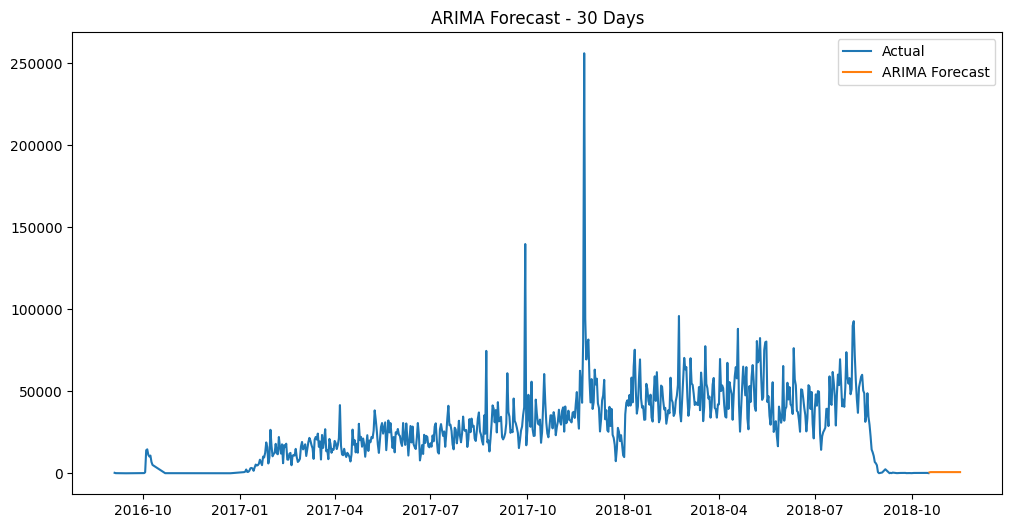

Regression MAE: 19129.494183154857
Regression RMSE: 23498.24619625291


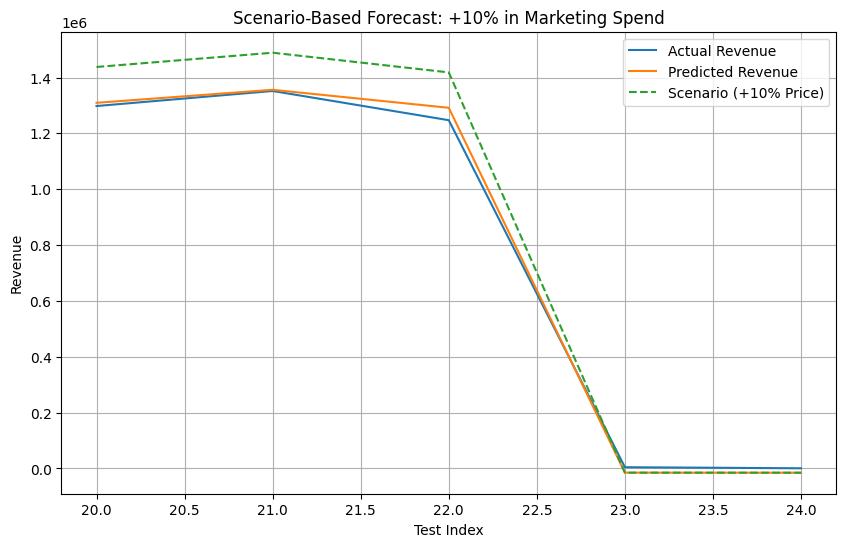

In [ ]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Step 3: Load dataset
df = pd.read_csv('master_dataset.csv', parse_dates=['order_purchase_timestamp'])

# Step 4: Basic Preprocessing
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date
daily_revenue = df.groupby('order_purchase_date')['payment_value'].sum().reset_index()
daily_revenue.columns = ['ds', 'y']

# Plot daily revenue
plt.figure(figsize=(12,6))
plt.plot(daily_revenue['ds'], daily_revenue['y'])
plt.title("Daily Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

# Step 5: Prophet Forecasting
prophet_model = Prophet()
prophet_model.fit(daily_revenue)

future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot forecast
fig1 = prophet_model.plot(forecast)
plt.title("Prophet Forecast - 30 Days")
plt.show()

# Step 6: ARIMA Forecasting
arima_model = auto_arima(daily_revenue['y'], seasonal=False, trace=True)
arima_forecast = arima_model.predict(n_periods=30)

# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(daily_revenue['ds'], daily_revenue['y'], label='Actual')
future_dates = pd.date_range(daily_revenue['ds'].max() + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast')
plt.title("ARIMA Forecast - 30 Days")
plt.legend()
plt.show()

# Step 7: Regression-Based Forecasting
# Aggregate revenue by month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly = df.groupby('order_month')[['payment_value', 'price', 'freight_value']].sum().reset_index()
monthly['order_month'] = monthly['order_month'].astype(str)

# Feature and Target
X = monthly[['price', 'freight_value']]
y = monthly['payment_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
print("Regression MAE:", mean_absolute_error(y_test, y_pred))
print("Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Step 8: Scenario-Based Forecast (+10% in marketing spend simulated by increasing price)
scenario = X_test.copy()
scenario['price'] *= 1.10

y_scenario = reg.predict(scenario)

# Compare original vs scenario
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='Actual Revenue')
plt.plot(y_test.index, y_pred, label='Predicted Revenue')
plt.plot(y_test.index, y_scenario, label='Scenario (+10% Price)', linestyle='--')
plt.title("Scenario-Based Forecast: +10% in Marketing Spend")
plt.xlabel("Test Index")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()
